In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from scipy.optimize import root

## Método de Newton para sistemas não-lineares

No exemplo a seguir, mostramos como podemos resolver um sistema de equações não-lineares usando o `scipy`. 

Procuramos as soluções para o sistema não-linear 

$$\begin{cases}f_1(x,y) &: x^2 + y^2 = 2 \\
f_2(x,y) &: x^2 - \frac{y^2}{9} = 1\end{cases}$$

Vamos plotar o gráficos das funções:

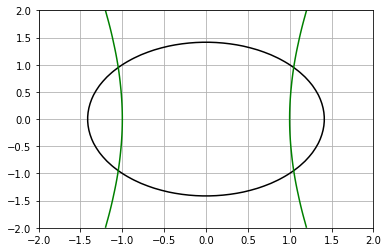

In [2]:
x = np.linspace(-2,2,50,endpoint=True)
y = x[:]
X,Y = np.meshgrid(x,y)

# define funções para plotagem
F1 = X**2 + Y**2 - 2
F2 = X**2 - Y**2/9 - 1

# curvas de nível
C = plt.contour(X,Y,F1,levels=[0],colors='k')
C = plt.contour(X,Y,F2,levels=[0],colors='g')
plt.grid(True)

Pela figura, vemos que existem 4 pontos de interseção entre as curvas e, portanto, 4 soluções, as quais formam o conjunto

$$S = \{(x_1^{*},y_1^{*}),(x_2^{*},y_2^{*}),(x_3^{*},y_3^{*}),(x_4^{*},y_4^{*}))$$

Agora, vamos usar a função `root` do `scipy` para computar essas soluções com base em estimativas iniciais. 

In [3]:
# define função para o vetor F(x)
def F(x):
    return [ x[0]**2 + x[1]**2 - 2,
             x[0]**2 - x[1]**2/9 - 1 ]


x,y = sy.symbols('x,y')

# usa computação simbólica para determinar a matriz Jacobiana
f1 = x**2 + y**2 - 2
f2 = x**2 - y**2/9 - 1

# gradientes

f1x,f1y = sy.diff(f1,x),sy.diff(f1,y)
f2x,f2y = sy.diff(f2,x),sy.diff(f2,y)

# imprime derivadas parciais
print(f1x)
print(f1y)
print(f2x)
print(f2y)

# monta matriz Jacobiana
def jacobian(x):
    return np.array([[2*x[0], 2*x[1]], [2*x[0],-2*x[1]/9]])

# resolve o sistema não-linear por algoritmo de Levenberg-Marqardt modificado

inicial = [[2,2],[-2,2],[-2,-2],[2,-2]]

S = []
i = 1
for vetor in inicial: 
    aux = root(F,vetor,jac=jacobian, method='lm')
    S.append(aux.x) 
    s = 'Solução x({0})* encontrada: {1}'
    print(s.format(i,aux.x))
    i +=1

2*x
2*y
2*x
-2*y/9
Solução x(1)* encontrada: [1.04880885 0.9486833 ]
Solução x(2)* encontrada: [-1.04880885  0.9486833 ]
Solução x(3)* encontrada: [-1.04880885 -0.9486833 ]
Solução x(4)* encontrada: [ 1.04880885 -0.9486833 ]


Em seguida, vamos plotar as soluções e as curvas 

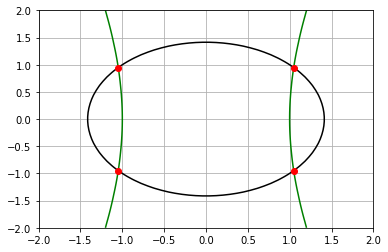

In [4]:
# curvas de nível
C = plt.contour(X,Y,F1,levels=[0],colors='k')
C = plt.contour(X,Y,F2,levels=[0],colors='g')
plt.grid(True)

# imprime interseções
for i in range(len(S)):
        plt.plot(S[i][0],S[i][1],'or')


### Exercício: 

Resolva os sistemas não-lineares da Lista de Exercícios 4 usando a mesma abordagem acima.

# Nota: Raízes de sistemas não-lineares

- Uma equação linear tem a forma:

$$f(x) = a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$$

- Uma equação não-linear possui "produtos de incógnitas", e.g. 

$$ f_2(x) = a_1 x_1 x_2 + a_2 x_2^2 + a_n x_nx_1 $$

- Um sistema de equações não-lineares é composto de várias equações não-lineares 

$$ f_1(x_1,x_2,\ldots,x_n) = 0 $$
$$ f_2(x_1,x_2,\ldots,x_n) = 0 $$
$$ \vdots $$
$$ f_n(x_1,x_2,\ldots,x_n) = 0 $$

- A solução do sistema é o vetor $ (x_1^{*},x_2^{*},\ldots,x_n^{*}) $ que satisfaz as $ n $ equações simultaneamente.

  
## Iteração de Ponto Fixo para sistemas não-lineares


- Aplicar o algoritmo iterativo em cada componente:

$$ x_1^{i+1} = \tilde{f}_1(x_1^{i},x_2^{i},\ldots,x_n^{i}) $$
$$ x_2^{i+1} = \tilde{f}_2(x_1^{i},x_2^{i},\ldots,x_n^{i}) $$
$$ \vdots $$
$$ x_3^{i+1} = \tilde{f}_3(x_1^{i},x_2^{i},\ldots,x_n^{i}) $$

As formas funcionais mudam porque devemos isolar a variável $ x_i $. 

Exemplo: encontrar a raiz do sistema abaixo:

$$ f_1(x,y) = x^2 + xy - 10 = 0 $$
$$ f_2(x,y) = y + 3xy^2 - 57 = 0 $$

Solução: 

Reescrevamos as equações na forma 

$$ x = \tilde{f}_1(x,y) = \sqrt{10 - xy} $$
$$ y = \tilde{f}_2(x,y) = \sqrt{\frac{57-y}{3x}} $$

de onde temos a iteração de ponto fixo dada por

$$ x^{i+1} = \sqrt{10 - x^iy^i} $$
$$ y^{i+1} = \sqrt{\frac{57-y^i}{3x^i}}, \quad i = 0,1,2,\ldots, $$

Usando $ (x^0,y^0) = (1.5,3.5) $ como "chute" inicial, computamos

$$ x^{1} = \sqrt{10 - x^0y^0} = \sqrt{10 - 1.5(3.5)} = 2.17945 $$
$$ y^{1} = \sqrt{\frac{57-y^0}{3x^1}} = \sqrt{\frac{57-3.5}{3(2.17945)}} = 2.86051 $$ (o valor de $ x^1 $ pode ser usado diretamente em vez de $ x^0 $.)

$$ x^{2} = \sqrt{10 - x^1y^1} = \sqrt{10 - 2.17945(2.86051)} = 1.94053 $$
$$ y^{2} = \sqrt{\frac{57-y^1}{3x^2}} = \sqrt{\frac{57-2.86051}{3(1.94053)}} = 3.04955 $$
$$ \ldots $$

O processo iterativo converge para a solução $ (x^{*},y^{*}) = (2,3) $.

**Notas:** 

 - A convergência por iteração de PF depende de como as equações $ \tilde{f}_1,\tilde{f}_2,\ldots,\tilde{f}_n $ são formuladas, bem como de um bom "chute" inicial. 
 
 - A iteração de PF é bastante restritiva nas soluções de sistemas não-lineares. 


## Newton-Raphson para sistema não-linear

- Depende de série de Taylor em $ n-$dimensões. 

- Para 2 dimensões, por exemplo, o método de Newton-Raphson pode ser escrito como:

$$ u_{i+1} = u_i + (x_{i+1} - x_i)\frac{\partial u_i}{\partial x} +(y_{i+1} - y_i)\frac{\partial u_i}{\partial y} $$
$$ v_{i+1} = v_i + (x_{i+1} - x_i)\frac{\partial v_i}{\partial x} +(y_{i+1} - y_i)\frac{\partial v_i}{\partial y} $$

- A estimativa da raiz corresponde aos valores de $ x $ e $ y $ para os quais $ u_{i+1} = 0 $ e $ v_{i+1} = 0 $. Então,  

$$ \frac{\partial u_i}{\partial x} x_{i+1} + 
   \frac{\partial u_i}{\partial y} y_{i+1} = 
   - u_i + \frac{\partial u_i}{\partial x}x_i 
         + \frac{\partial u_i}{\partial y}y_i  $$
$$ \frac{\partial v_i}{\partial x} x_{i+1} + 
   \frac{\partial v_i}{\partial y} y_{i+1} = 
   - v_i + \frac{\partial v_i}{\partial x}x_i 
         + \frac{\partial v_i}{\partial y}y_i,  $$

que é um sistema nas incógnitas $ x_{i+1} $ e $ y_{i+1} $.

- Manipulações algébricas permitem solucionar este sistema (e.g. regra de Cramer):

$$ x_{i+1} = x_i - J^{-1}\left(u_i\frac{\partial v_i}{\partial y} - v_i\frac{\partial u_i}{\partial y}\right) $$
$$ y_{i+1} = y_i - J^{-1}\left(v_i\frac{\partial u_i}{\partial x} - u_i\frac{\partial v_i}{\partial x}\right), $$

onde 

$$ J = \frac{\partial u_i}{\partial x}\frac{\partial v_i}{\partial y} - \frac{\partial u_i}{\partial y}\frac{\partial v_i}{\partial x} $$

é o determinante da matriz _Jacobiana_ do sistema.

Exemplo: resolver o mesmo sistema do PF

Solução: 

- Inicialmente, calculemos as derivadas parciais no ponto inicial:

$$ \frac{\partial u_0}{\partial x} = 2x_0 + y_0 = 2(1.5) + 3.5 = 6.5, \ \ \ \ \frac{\partial u_0}{\partial y} = x_0 = 1.5 $$
$$ \frac{\partial v_0}{\partial x} = 3y_0^2 = 3(3.5)^2 = 36.75, \ \ \ \ \frac{\partial v_0}{\partial y} = 1 + 6x_0y_0 = 1 + 6(1.5)(3.5) = 32.5 $$

- O determinante é $ J = 6.5(32.5) - 1.5(36.75) = 156.125 $.

- Calculamos os valores da função no ponto inicial

$$ u(x_0,y_0) = u_0 = -2.5, \quad v(x_0,y_0) = v_0 = 1.625 $$

- Calculamos os valores no próximo passo, i.e., $ (x^1,y^1) $.

$$ x^1 = 1.5 - \frac{\cdots}{156.125} = 2.03603 $$
$$ y^1 = 3.5 - \frac{\cdots}{156.125} = 2.84388 $$

- O processo iterativo converge para a solução $ (x^{*},y^{*}) = (2,3) $.


*Ref.: Chapra & Canale, sec. 6.6*